In [21]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [5]:
# Save config information.
api_key = "2bc5a6f21983e3b3e4adfdaf55edd5f2"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2bc5a6f21983e3b3e4adfdaf55edd5f2&units=metric&q='

In [6]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [13.52, 9.92, 4.13, 4.94, 24.99, 27.86, 14.39, 7.63, 27.46, 20.9]


In [7]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,13.52
1,London,51.5085,9.92
2,Oslo,59.9127,4.13
3,Beijing,39.9075,4.94
4,Mumbai,19.0144,24.99
5,Manila,14.6042,27.86
6,New York,40.7143,14.39
7,Seattle,47.6062,7.63
8,Dallas,32.7668,27.46
9,Taipei,25.0478,20.90


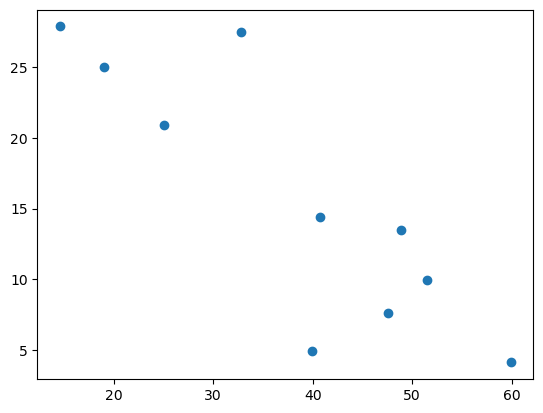

In [9]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(lat, temp)

In [13]:
# Perform a linear regression on temperature vs. latitude
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(lat, temp)

# Get regression values
pe_slope, pe_int, pe_r, pe_p, pe_std_err

(-0.5268277631849837,
 35.59007276678973,
 -0.8551651917813925,
 0.0016103493591924235,
 0.11290194215590096)

In [34]:
# Create line equation string
pe_fit = weather_data["lat"]*pe_slope + pe_int

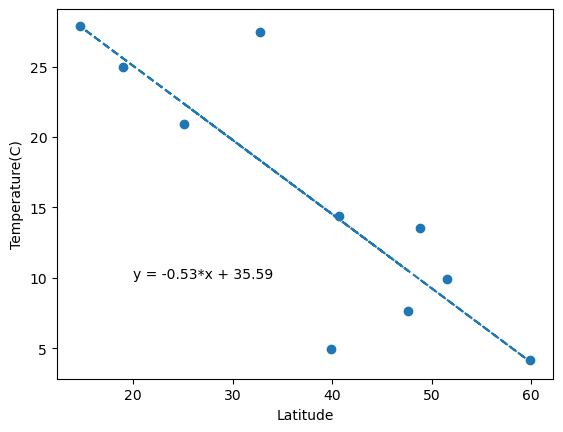

0.7313075052345062

In [35]:
# Create Plot
plt.scatter(lat, temp)
plt.plot(lat,pe_fit,"--")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')
plt.annotate(f'y = {round(pe_slope,2)}*x + {round(pe_int,2)}', xy=(20, 10))
plt.show()

# Print r square value
r2 = r2_score(temp, pe_fit)
r2

# Show plot


In [38]:
# Use the line equation to predict the temperature for Florence at a latitude of 43.77 degrees
pred_temp_flor = 43.77*pe_slope + pe_int
pred_temp_flor

12.530821572182994

In [39]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
response['main']['temp']

9.32